In [1]:
# import stuff

import numpy as np
import math as m
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# change this with the folder where you have saved the file
os.chdir('C:\\Users\\nicol\\Desktop\\pythonfiles\\micrometereology\\02')

In [2]:
# FUNCTIONS

def plot_histogram(array_data, num, color, label):
    # plots the histogram of an array of data
    x = np.linspace(min(array_data), max(array_data), num=num)
    y = np.histogram(array_data, bins=num, density=True)
    delta = num/100000
    width_bar = (max(array_data) - min(array_data)) / num + delta
    plt.bar(x, y[0], width=width_bar, align='center', color=color, label=label)
    area = np.sum(y[0]*(width_bar-delta))
    print(f"area under graph = {area:.5f}")

def plot_Gaussian(array_data, mu, sig, color, label):
    # computes the gaussian distribution given mu and sig and plots it in the range of the data to avoid zeros
    x = np.linspace(min(array_data), max(array_data), num=100)
    y = 1/(sig*np.sqrt(2*np.pi)) * np.exp(-1/2*((x-mu)/sig)**2)
    plt.plot(x, y, color=color, label=label)

In [8]:
# DATA

data = pd.read_csv('Hoevsoere2008.csv', delimiter=',', header=0, 
                    names=['time','ustar','Q0','direction','theta0', 'V10', 'V40','V60','V80','V100'])

ustar = data['ustar'].values
Q0 = data['Q0'].values
direction = data['direction'].values
theta0 = data['theta0'].values
V10 = data['V10'].values
V40 = data['V40'].values
V60 = data['V60'].values
V80 = data['V80'].values
V100 = data['V100'].values

k = 0.4
g = 9.8


all data: mean=-0.075, std=32.598
area under graph = 1.00000


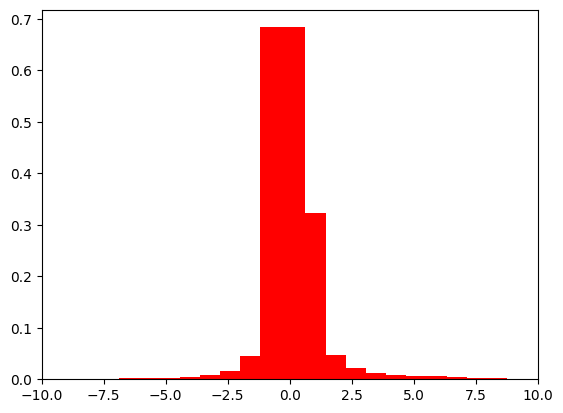

cleaned data: mean=0.051, std=8.781
area under graph = 1.00000


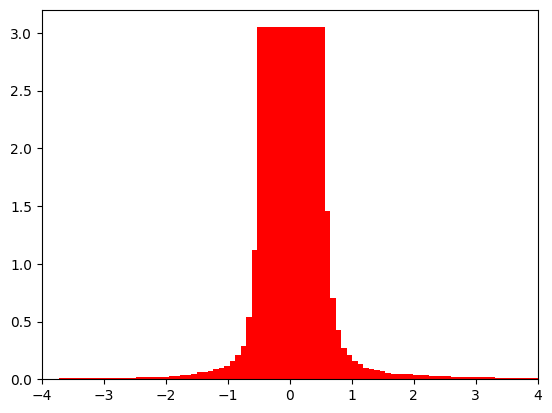

In [7]:
# QUESTION 1

Lreciprocal =  -k*g*Q0/(theta0*ustar**3)

Lreciprocal_mean = np.mean(Lreciprocal)    #= mu
Lreciprocal_std = np.std(Lreciprocal)      #= sigma
print(f"all data: mean={Lreciprocal_mean:.3f}, std={Lreciprocal_std:.3f}")
plot_histogram(Lreciprocal, 10000,'r', 'all data')
plt.xlim(-10,10)
plt.show()


Lclean = Lreciprocal[(Lreciprocal > -500) & (Lreciprocal < 500)]
Lclean_mean = np.mean(Lclean)    #= mu
Lclean_std = np.std(Lclean)      #= sigma
print(f"cleaned data: mean={Lclean_mean:.3f}, std={Lclean_std:.3f}")
plot_histogram(Lclean, 10000,'r', 'cleaned')
plt.xlim(-4,4)
plt.show()

mean [4.5754496 5.7202108 6.1514136 6.5331456 6.8125472]
std [2.25613972 2.59445404 2.69458737 2.79888577 2.89453822]
Equation of the line: y = 1.08244x -2.60170


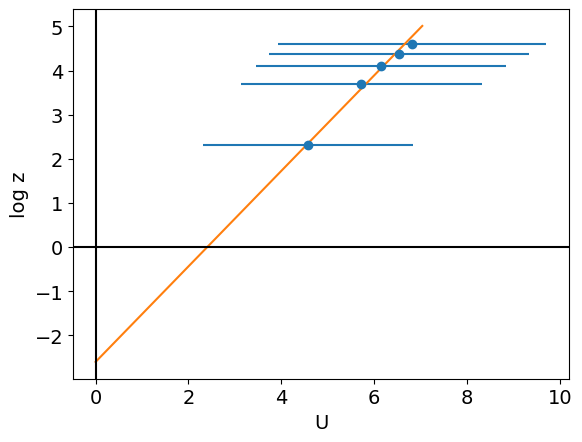

mean values of ustar = 0.43297 and zo = -2.60170
Equation of the line: y = 1.08244x -2.60170


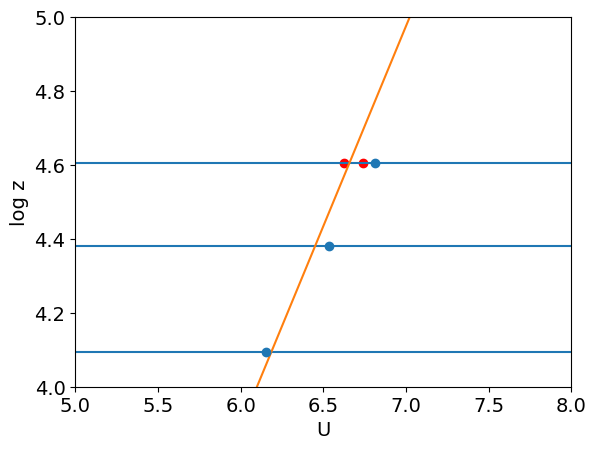

In [96]:
# QUESTION 2

#####     a     ################################################################

V_all = []

for i in range(1,len(data)):
    if 60 < direction[i] < 120:
        if abs(Lreciprocal[i]) < 0.0008:
            V_all.append([V10[i], V40[i], V60[i], V80[i], V100[i]])

V_all_mean = np.mean(V_all, axis=0) 
V_all_std = np.std(V_all, axis=0) 

print('mean', V_all_mean)
print('std', V_all_std)

z = [10,40,60,80,100]
logz = np.log(z)
x_error = V_all_std

#plt.yscale('log')
#plt.scatter(V_all_mean, logz)
plt.errorbar(V_all_mean, logz, xerr = x_error, fmt ='o')


#####     b     ################################################################

# method of least squared
x = V_all_mean[:-1]
y = logz[:-1]

def linear_regression(x,y):
        x_ave = np.sum(x)/len(x)
        y_ave = np.sum(y)/len(y)
        squaresumx = np.sum((x-x_ave)**2)
        squaresumy = np.sum((y-y_ave)**2)
        crossterm = np.sum((x-x_ave)*(y-y_ave))
        slope = crossterm/squaresumx
        intercept = y_ave - slope*x_ave
        print(f"Equation of the line: y = {slope:.5f}x {intercept:.5f}")

        x_interpol = np.insert(x, 0, 0)
        x_interpol = np.append(x_interpol, x_interpol[-1]+0.5)
        y_interpol = x_interpol * slope + intercept
        plt.plot(x_interpol, y_interpol)
        
        plt.axhline(0,color='k') 
        plt.axvline(0,color='k') 
        plt.rc('font', size=14)
        plt.rc('axes', titlesize=14)
        plt.rc('axes', labelsize=14)
        plt.xlabel('U')
        plt.ylabel('log z')


        return slope, intercept

slope, intercept = linear_regression(x,y)
plt.show()

#####     c     ################################################################

z0c = intercept
ustarc = k*slope
print(f"mean values of ustar = {ustarc:.5f} and zo = {z0c:.5f}")


#####     d     ################################################################

U60_mean = V_all_mean[2]
U80_mean = V_all_mean[3]
U100_mean = V_all_mean[4]
z60 = logz[2]
z80 = logz[3]
z100 = logz[4]

U100_60 = (z100-z60)/slope + U60_mean
U100_80 = (z100-z80)/slope + U80_mean
U100_array = [U100_60, U100_80]
z100_array = [z100, z100]

plt.errorbar(V_all_mean, logz, xerr = x_error, fmt ='o')
slope, intercept = linear_regression(x,y)


plt.scatter(U100_array, z100_array, color = 'r')

plt.xlim(5,8)
plt.ylim(4,5)
plt.show()



In [ ]:
#####     e     ################################################################
